# Guided Project: Popular Data Science Questions

## Stack Exchange

In this project, we'll be looking at a Stack Exchange website, namely  Data Science Stack Exchange (DSSE).
- Questions welcome on the site are data science-related questions for Data science professionals, Machine Learning specialists, and those interested in learning more about the field.
- The special thing about this website is the focus on questions-answers only. It's not a discussion forum.

The dataset we'll be using in this project contains columns for the posts of questions in 2019 on DSSE. 

## Exploring the Data

In [82]:
import pandas as pd

ds = pd.read_csv("2019_questions.csv")

In [83]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


We notice the followings:
- FavouriteCount column has missing values ie. 7432 values.
- FavouriteCount column has the type float.
- CreationDate column doesn't have the datetime type.

In [84]:
ds["Tags"].value_counts()

<machine-learning>                                         118
<python><pandas>                                            58
<python>                                                    55
<r>                                                         38
<tensorflow>                                                36
                                                          ... 
<python><feature-scaling>                                    1
<python><numpy><graphs><embeddings><representation>          1
<machine-learning><lstm><rnn><accuracy><metric>              1
<keras><sequence>                                            1
<lstm><multilabel-classification><recurrent-neural-net>      1
Name: Tags, Length: 6462, dtype: int64

## Cleaning the Data

In [85]:
# Fill in the missing values with 0

ds.fillna(value=0, inplace=True)

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  8839 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [86]:
# Reset the types of some columns

ds["FavoriteCount"] = ds["FavoriteCount"].astype('int64') 
ds["CreationDate"] = ds["CreationDate"].astype('datetime64[ns]')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [87]:
# Clean the Tags column

ds["Tags"] = ds["Tags"].str.replace("<","").str.replace(">",",")
ds["Tags"] = ds["Tags"].str.rstrip(',')
ds["Tags"].value_counts()

machine-learning                                  118
python,pandas                                      58
python                                             55
r                                                  38
tensorflow                                         36
                                                 ... 
regression,cnn,convolution,image-preprocessing      1
lstm,multilabel-classification                      1
classification,scikit-learn,loss-function           1
python,classification,class-imbalance               1
machine-learning,svm,regularization,perceptron      1
Name: Tags, Length: 6462, dtype: int64

In [88]:
ds.head(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"machine-learning,data-mining",0,0
1,44420,2019-01-23 09:34:01,0,25,"machine-learning,regression,linear-regression,...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"python,time-series,forecast,forecasting",0,0


## Most Used and Most Viewed

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

In [89]:
ds["Tags"] = ds["Tags"].str.split(",")
ds.head(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0


In [90]:
# Count the times each tag was used
tag_list = {}

for row in ds["Tags"]:
    for tag in row: 
        if tag not in tag_list:
            tag_list[tag] = 1
        else:
            tag_list[tag] += 1
most_used = pd.DataFrame.from_dict(tag_list, orient='index', columns=["time_used"])
most_used= most_used.sort_values(by="time_used").tail(20)

<AxesSubplot:>

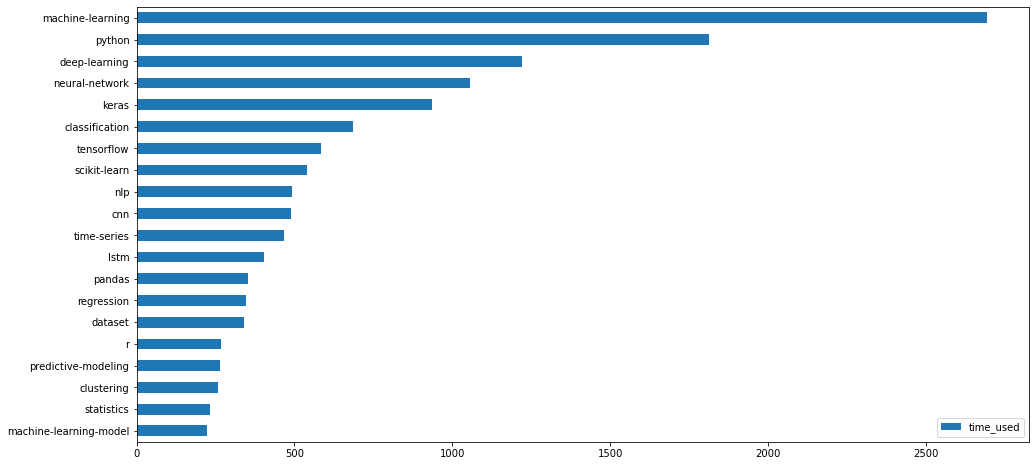

In [91]:
import matplotlib.pyplot as plt

most_used.plot(kind="barh", figsize=(16,8))

In [92]:
# Count the times each tag was viewed

tag_view_list = {}

for index, row in ds.iterrows():
    for tag in row["Tags"]:
        if tag not in tag_view_list:
            tag_view_list[tag] = row["ViewCount"]
        else:
            tag_view_list[tag] += row["ViewCount"]

most_viewed = pd.DataFrame.from_dict(tag_view_list, orient='index', columns=["time_viewed"])
most_viewed = most_viewed.sort_values(by="time_viewed").tail(20)

<AxesSubplot:>

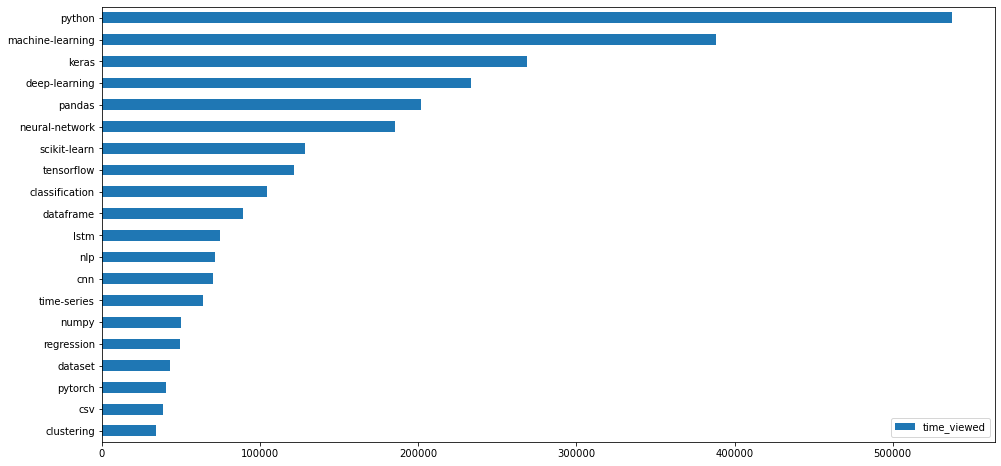

In [93]:
most_viewed.plot(kind="barh", figsize=(16,8))

## Relations between Tags

In [94]:
most_used

,time_used
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


In [95]:
most_viewed

,time_viewed
clustering,33928
csv,38654
pytorch,40240
dataset,43151
regression,49451
numpy,49767
time-series,64134
cnn,70349
nlp,71382
lstm,74458


In [96]:
# Check what tags are in most_used, but not in most_viewed
# Join two dataframes on the index as there is no common column
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used

,time_used,time_viewed
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33928.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


In [97]:
# Check what tags are in most_viewed, but not in most_used
in_viewed = pd.merge(most_used, most_viewed, how='right', right_index=True, left_index=True)
in_viewed

,time_used,time_viewed
clustering,257.0,33928
csv,NaN,38654
pytorch,NaN,40240
dataset,340.0,43151
regression,347.0,49451
numpy,NaN,49767
time-series,466.0,64134
cnn,489.0,70349
nlp,493.0,71382
lstm,402.0,74458


The tags present in most_used and not present in most_viewed are:

- machine-learning-model
- statistics
- predictive-modeling
- r

And the tags present in most_viewed but not in most_used are:

- csv
- pytorch
- dataframe
- numpy

Some tags also stand out as being related eg. pandas and python, while some appear to have no relations eg. pandas and r.
Thus, the relationships between pair of tags may depend on the knowledge and experience of the person who ask the questions, not necessarily how the pair of tags is perceived to be related. 

## Enter Domain Knowlege

It's noticed that the most used tags are also the most viewed. From the top 10 tags of each, here's a list of the tags in common: python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification, scikit-learn.

The [tags page](https://datascience.stackexchange.com/questions/tagged/python) on DSSE might shed light to the relations between these tags.

- Python: Use for data science questions related to the programming language Python. Not intended for general coding questions (-> stackoverflow).
- machine-learning: Machine Learning is a subfield of computer science that draws on elements from algorithmic analysis, computational statistics, mathematics, optimization, etc. It is mainly concerned with the use of data to construct models that have high predictive/forecasting ability. Topics include modeling building, applications, theory, etc.
- deep-learning: a new area of Machine Learning research concerned with the technologies used for learning hierarchical representations of data, mainly done with deep neural networks (i.e. networks with two or more hidden layers), but also with some sort of Probabilistic Graphical Models.
- neural-network: Artificial neural networks (ANN), are composed of 'neurons' - programming constructs that mimic the properties of biological neurons. A set of weighted connections between the neurons allows information to propagate through the network to solve artificial intelligence problems without the network designer having had a model of a real system.
- keras: Keras is a popular, open-source deep learning API for Python built on top of TensorFlow and is useful for fast implementation. Topics include efficient low-level tensor operations, computation of arbitrary gradients, scalable computations, export of graphs, etc.
- tensorflow: TensorFlow is an open source library for machine learning and machine intelligence. TensorFlow uses data flow graphs with tensors flowing along edges. For details, see https://www.tensorflow.org. TensorFlow is released under an Apache 2.0 License.
- classification: An instance of supervised learning that identifies the category or categories which a new instance of dataset belongs.
- scikit-learn: scikit-learn is a popular machine learning package for Python that has simple and efficient tools for predictive data analysis. Topics include classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

## Just a Fad?

Before we officially make our recommendation, it would be nice to solidify our findings with additional proof. More specifically, one thing that comes to mind is "Is deep learning just a fad?" We will track the interest in deep learning across time by analysing another dataset ie. all_questions.csv containing all of the questions ever asked on DSSE, their dates and tags.

In [98]:
# Read the dataset to dataframe
questions = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

In [99]:
# Transform the tags column
questions["Tags"] = questions["Tags"].str.replace(">","").str.replace("<",",")
questions["Tags"] = questions["Tags"].str.lstrip(",")
questions["Tags"] = questions["Tags"].str.split(",")
questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

In [100]:
dl = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]

dl_dict = {}

for row in questions["Tags"]:
    for tag in row:
        if tag in dl:
            if tag not in dl_dict:
                dl_dict[tag] = 1
            else:
                dl_dict[tag] += 1
dl_dict

{'keras': 1750,
 'tensorflow': 1229,
 'cnn': 815,
 'neural-network': 2939,
 'lstm': 694,
 'deep-learning': 2805,
 'scikit-learn': 1307}

In [101]:
# Transform dictionary to dataframe

dl_df = pd.DataFrame.from_dict(dl_dict, orient="index", columns=["tags_used"])
dl_df.sort_values(by="tags_used")

,tags_used
lstm,694
cnn,815
tensorflow,1229
scikit-learn,1307
keras,1750
deep-learning,2805
neural-network,2939


In [102]:
# We'll now create a function that assigns 1 to deep learning questions and 0 otherwise; and we use it.

def deep_learning(row):
    for tag in row:
        if tag in dl:
            return 1
    return 0

questions["Deep Learning"] = questions["Tags"].apply(deep_learning)
questions.head()

,Id,CreationDate,Tags,Deep Learning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates:

In [121]:
# Create a new column for year & quarter

def quarter(row):
    year = str(row.year)
    qrt = str(((row.month - 1) // 3) + 1)
    return "{0}Q{1}".format(year, qrt)
    


questions["Quarter"] = questions["CreationDate"].apply(quarter)
questions.head()

,Id,CreationDate,Tags,Deep Learning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,2019Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,2019Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,2019Q1
3,45426,2019-02-12 04:51:49,[keras],1,2019Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,2019Q1


In [128]:
# Group by Quarter and calculate number of deep learning questions by quarter

quarterly = questions.groupby('Quarter').agg({"Deep Learning": ['sum', 'size']})

quarterly.columns = ["DeepLearningQuestions", "Total Questions"]
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"] / quarterly["Total Questions"]
quarterly.reset_index(inplace=True)
quarterly.head()

,Quarter,DeepLearningQuestions,Total Questions,DeepLearningRate
0,2014Q2,9,157,0.057325
1,2014Q3,13,189,0.068783
2,2014Q4,21,216,0.097222
3,2015Q1,18,190,0.094737
4,2015Q2,28,284,0.098592


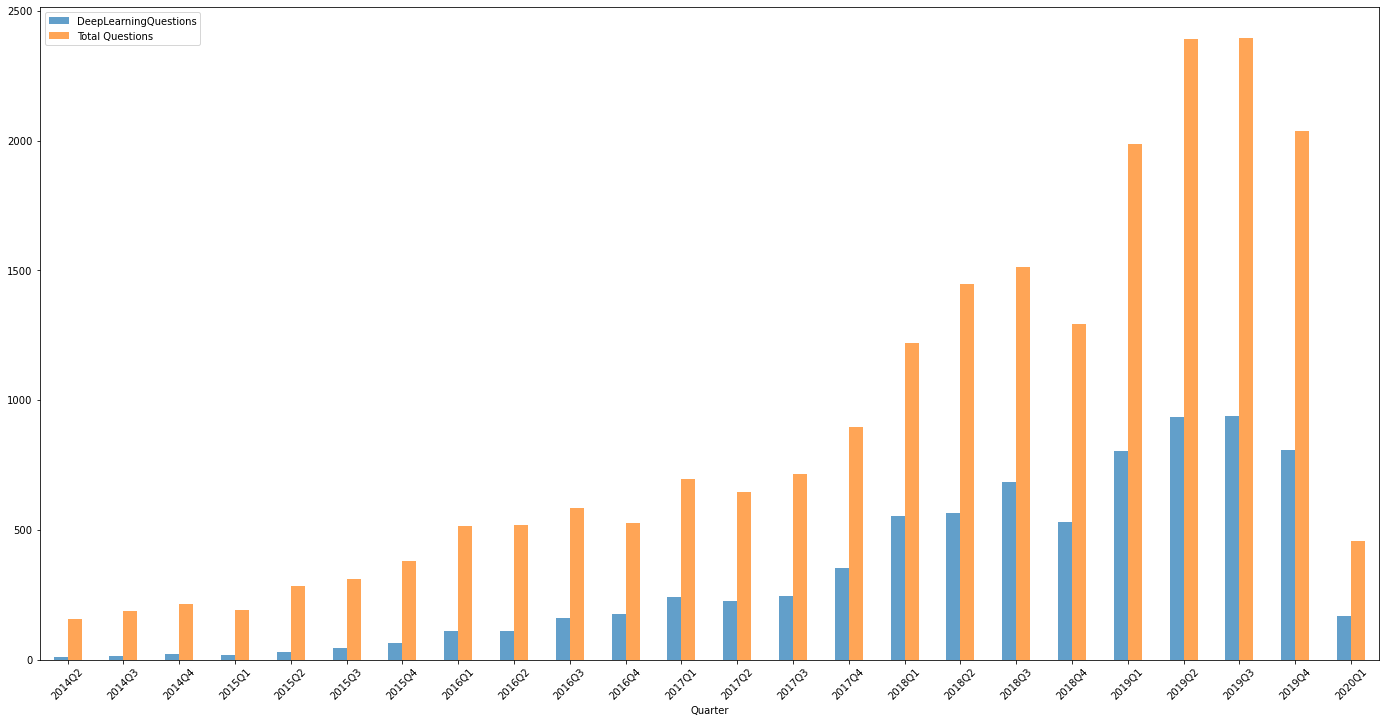

In [146]:
ax2 = quarterly.plot(x="Quarter", y=["DeepLearningQuestions", "Total Questions"], kind="bar", figsize=(24,12), rot=45, alpha=0.7)
plt.show()


From the bar chart, we can see that there in an increase in interest in deep learning questions overtime. Thus, we can conclude that deep learning is among the most popular data science topics now.